## Show Environment Use

Render a sample run through the of environment with random actions. 

In [1]:
from AppalachianRL.envs.trail import AppalachianTrailEnv

env = AppalachianTrailEnv()

obs, info = env.reset()
done = False

while not done:
    action = env.action_space.sample()
    obs, reward, done, trunc, info = env.step(action)
    env.render()

Day 1: 2192.0 miles left | Energy 88.0 | Food 9.2 | Weather 2
Day 2: 2179.0 miles left | Energy 73.7 | Food 8.2 | Weather 0
Day 3: 2170.0 miles left | Energy 60.2 | Food 7.4 | Weather 2
Day 4: 2152.0 miles left | Energy 38.6 | Food 6.2 | Weather 0
Day 5: 2152.0 miles left | Energy 100.0 | Food 5.7 | Weather 0
   INVALID ACTION: No resupply point nearby.
Day 6: 2147.0 miles left | Energy 100.0 | Food 5.7 | Weather 2
Day 7: 2147.0 miles left | Energy 100.0 | Food 5.2 | Weather 0
Day 8: 2126.0 miles left | Energy 74.8 | Food 4.0 | Weather 0
Day 9: 2101.0 miles left | Energy 44.8 | Food 2.8 | Weather 0
Day 10: 2086.0 miles left | Energy 28.3 | Food 1.8 | Weather 0
Day 11: 2086.0 miles left | Energy 100.0 | Food 1.3 | Weather 0
Day 12: 2076.0 miles left | Energy 90.0 | Food 0.5 | Weather 0
   INVALID ACTION: No resupply point nearby.
Day 13: 2063.0 miles left | Energy 100.0 | Food 0.5 | Weather 0
   FAILURE: You ran out of food!
Day 14: 2045.0 miles left | Energy 78.4 | Food 0.0 | Weather 0

## Test Solvers

Run episodes on solvers to test how well they stack up. Include random actions for comparison.


Training Q-Learning...
   FAILURE: You ran out of energy!
   FAILURE: You ran out of food!
   FAILURE: You ran out of energy!
   FAILURE: You ran out of food!
   FAILURE: You ran out of energy!
   FAILURE: You ran out of energy!
   FAILURE: You ran out of energy!
   FAILURE: You ran out of energy!
   INVALID ACTION: No resupply point nearby.
   INVALID ACTION: No resupply point nearby.
   INVALID ACTION: No resupply point nearby.
   FAILURE: You ran out of food!
   FAILURE: You ran out of energy!
   FAILURE: You ran out of energy!
   FAILURE: You ran out of energy!
   FAILURE: You ran out of energy!
   INVALID ACTION: No resupply point nearby.
   FAILURE: You ran out of energy!
   INVALID ACTION: No resupply point nearby.
   INVALID ACTION: No resupply point nearby.
   FAILURE: You ran out of food!
   FAILURE: You ran out of energy!
   FAILURE: You ran out of energy!
   FAILURE: You ran out of energy!
   FAILURE: You ran out of energy!
   INVALID ACTION: No resupply point nearby.
   I

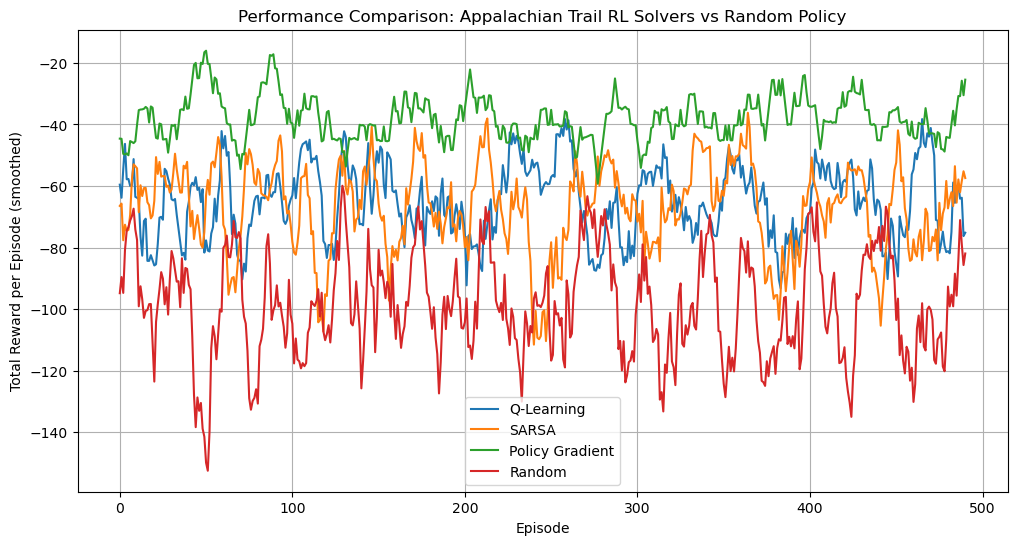

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from AppalachianRL.envs.trail import AppalachianTrailEnv
from AppalachianRL.solvers.q_learning import QLearningSolver
from AppalachianRL.solvers.sarsa import SarsaSolver
from AppalachianRL.solvers.policy_gradient import PolicyGradientSolver
from AppalachianRL.solvers.random import RandomAgent


# ---------------------------
# Experiment Parameters
# ---------------------------
EPISODES = 500     # number of training episodes for each solver
SEED = 2025

# ---------------------------
# Initialize environment
# ---------------------------
env = AppalachianTrailEnv(seed=SEED)

# ---------------------------
# Initialize solvers
# ---------------------------
solvers = {
    "Q-Learning": QLearningSolver(env, learning_rate=0.1, gamma=0.99, epsilon=0.2, seed=SEED),
    "SARSA": SarsaSolver(env, learning_rate=0.1, gamma=0.99, epsilon=0.2, seed=SEED),
    "Policy Gradient": PolicyGradientSolver(env, lr=1e-3, gamma=0.99, seed=SEED),
    "Random": RandomAgent(env, seed=SEED)
}

# ---------------------------
# Train each solver and collect rewards
# ---------------------------
all_rewards = {}

for name, solver in solvers.items():
    print(f"\nTraining {name}...")
    rewards = solver.train(episodes=EPISODES)
    all_rewards[name] = rewards

# ---------------------------
# Plot results
# ---------------------------
plt.figure(figsize=(12, 6))
for name, rewards in all_rewards.items():
    smoothed = np.convolve(rewards, np.ones(10)/10, mode='valid')
    plt.plot(smoothed, label=name)

plt.title("Performance Comparison: Appalachian Trail RL Solvers vs Random Policy")
plt.xlabel("Episode")
plt.ylabel("Total Reward per Episode (smoothed)")
plt.legend()
plt.grid(True)
plt.show()


## Test Advanced Environment


Training Q-Learning...
Episode 50/500 | Reward: 86.2
Episode 100/500 | Reward: -15.6
Episode 150/500 | Reward: 167.8
Episode 200/500 | Reward: 140.0
Episode 250/500 | Reward: 9.4
Episode 300/500 | Reward: 76.7
Episode 350/500 | Reward: -1.6
Episode 400/500 | Reward: 103.4
Episode 450/500 | Reward: 31.3
Episode 500/500 | Reward: 162.4

Training SARSA...
Episode 50/500 | Reward: 166.0
Episode 100/500 | Reward: 81.9
Episode 150/500 | Reward: 79.1
Episode 200/500 | Reward: 40.7
Episode 250/500 | Reward: 71.2
Episode 300/500 | Reward: 71.3
Episode 350/500 | Reward: 91.2
Episode 400/500 | Reward: 57.5
Episode 450/500 | Reward: 215.7
Episode 500/500 | Reward: 97.6

Training Policy Gradient...
Episode 50/500 | Reward: 34.2
Episode 100/500 | Reward: 24.9
Episode 150/500 | Reward: 36.2
Episode 200/500 | Reward: 35.7
Episode 250/500 | Reward: 14.5
Episode 300/500 | Reward: 40.2
Episode 350/500 | Reward: 34.7
Episode 400/500 | Reward: 28.1
Episode 450/500 | Reward: 23.7
Episode 500/500 | Reward: 

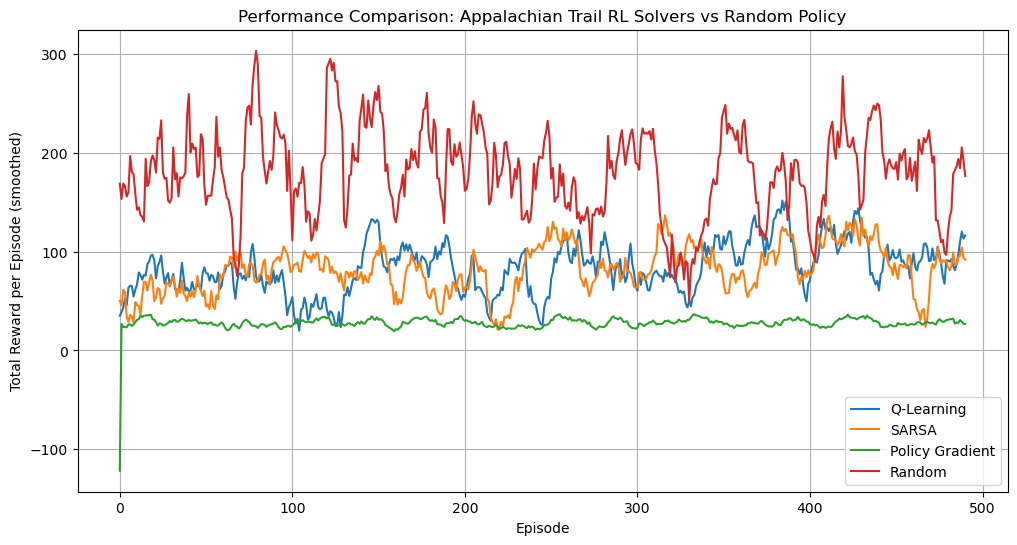

In [3]:

from AppalachianRL.envs.trail_adv import AppalachianTrailAdvEnv

# ---------------------------
# Initialize environment
# ---------------------------
env = AppalachianTrailAdvEnv(seed=SEED)

# ---------------------------
# Initialize solvers
# ---------------------------
solvers = {
    "Q-Learning": QLearningSolver(env, learning_rate=0.1, gamma=0.99, epsilon=0.2, seed=SEED),
    "SARSA": SarsaSolver(env, learning_rate=0.1, gamma=0.99, epsilon=0.2, seed=SEED),
    "Policy Gradient": PolicyGradientSolver(env, lr=1e-3, gamma=0.99, seed=SEED),
    "Random": RandomAgent(env, seed=SEED)
}

# ---------------------------
# Train each solver and collect rewards
# ---------------------------
all_rewards = {}

for name, solver in solvers.items():
    print(f"\nTraining {name}...")
    rewards = solver.train(episodes=EPISODES)
    all_rewards[name] = rewards

# ---------------------------
# Plot results
# ---------------------------
plt.figure(figsize=(12, 6))
for name, rewards in all_rewards.items():
    smoothed = np.convolve(rewards, np.ones(10)/10, mode='valid')
    plt.plot(smoothed, label=name)

plt.title("Performance Comparison: Appalachian Trail RL Solvers vs Random Policy")
plt.xlabel("Episode")
plt.ylabel("Total Reward per Episode (smoothed)")
plt.legend()
plt.grid(True)
plt.show()
